In [1]:
import torch
import matplotlib.pyplot as plt

# 构造数据

In [2]:
# torch.unsqueeze()用于对数据维度进行扩充。
# 给指定位置加上维数为一的维度，比如原本有个三行的数据(3),在0的位置加了一维就变成一行三列(1,3)。
# torch.linspace(start, end, steps)用于在区间[start,end]之间均匀的生成steps个点
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
# torch.rand(sizes)返回一个张量，包含了从区间[0, 1)的均匀分布中抽取的一组随机数。张量的形状由参数sizes定义。
y = x.pow(2) + 0.2*torch.rand(x.size())

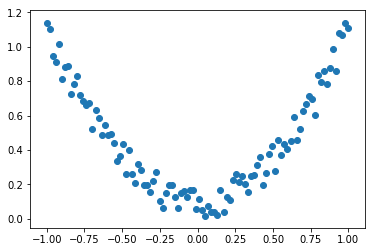

In [3]:
# 画图
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

# 建立神经网络

In [4]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()  # 继承__init__功能
        self.hidden = torch.nn.Linear(n_feature, n_hidden) # 隐藏层线性输出
        self.predict = torch.nn.Linear(n_hidden, n_output) # 输出层线性输出
        
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [5]:
net = Net(n_feature=1, n_hidden=10, n_output=1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


# 训练网络

In [6]:
# 定义优化器
optimizer = torch.optim.SGD(net.parameters(), lr=0.2) # 传入 net 的所有参数, 学习率
# 定义损失函数
loss_func = torch.nn.MSELoss()

for _ in range(100):
    # 调用了net的__call__()
    prediction = net(x)    # 喂给 net 训练数据 x, 输出预测值
    
    loss = loss_func(prediction, y) # 计算误差
    
    optimizer.zero_grad()  # 清空上一步的梯度
    loss.backward()     # 误差反向传播，计算出各个参数的梯度
    
    optimizer.step()    # 使用梯度计算出新的参数值

# 可视化训练过程

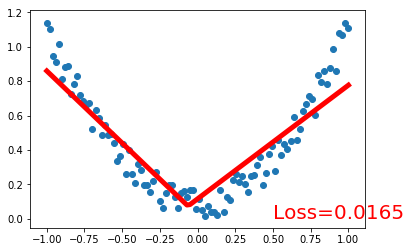

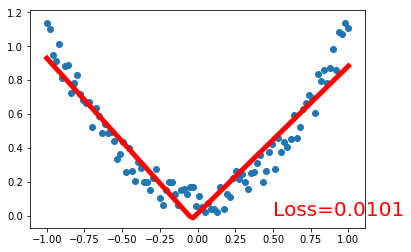

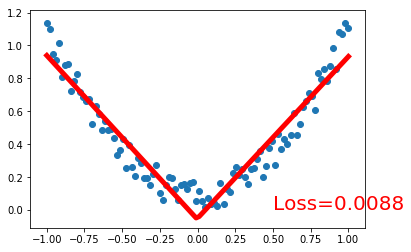

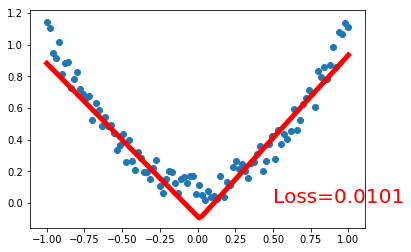

In [7]:
plt.ion()   # 动态画图

for t in range(200):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()